# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

## Содержание методического пособия:


<ol>
<li>Что такое TensorFlow</li>
<li>Основы синтаксиса TensorFlow</li>
<li>Пример нейросети на TensorFlow</li>
</ol>

## Что такое TensorFlow

TensorFlow - это фреймворк для создания ML моделей. TensorFlow предназначен в первую очередь для Deep Learning, т.е. создания современных нейросетей. Однако в TensorFlow также есть поддержка некоторых классических ML алгоритмов: K-means clustering, Random Forests, Support Vector Machines, Gaussian Mixture Model clustering, Linear/logistic regression.

TensorFlow выпустила компания Google в 2015. TensorFlow - это opensource проект. На данный момент это один из основных инструментов для создания нейросетей в рабочих целях. TensorFlow позволяет создавать нейронные сети как для кластеров из большого количества вычислительных устройств, так и для устройств с относительно небольшой вычислитей мощностью, таких как смартфоны и одноплатные компьютеры.

TensorFlow применяется самой компанией Google для ее поиска, почты, переводчика, распознования голоса, внутренних нужд наподобие мониторинга оборудования. TensorFlow используется различными компаниями для различных проектов связанных с компьютерным зрением, решением задач ранжирования и т.д.


## Основы синтаксиса TensorFlow

Процесс создания нейросети на TensorFlow схож с разобранным нами процессом обучения нейросети на Keras. Отличее здесь в том, что здесь нам нужно прописать больше деталей в коде. 

Название TensorFlow означает поток тензоров. Тензоры - это массивы. Данные в компьютере предствлены часто в виде массивах и работа с этими массивами подразумевает их преобразования. Преобразования осуществляются через, к примеру, математические операции. Работа TensorFlow складывается из цепочки преобразований тензоров, т.е. данных. Сами операции осуществляющие преобразование данных представлены в TensorFlow в виде графов. Особенностью TensorFlow версии 1 является то, что сначала необходимо декларировать переменные и вычисления, которые будут совершенны над ними, а потом уже непосредственно запускать работу над данными. 

Давайте рассмотрим базовые вещи в синтаксисе Tensorflow 2.

Выведем строку Hello world, а также версию tensorflow

In [1]:
!pip install --upgrade pip
!pip install tensorflow
!pip install tf-nightly

Requirement already up-to-date: pip in ./env/lib/python3.6/site-packages (20.0.2)
Processing /home/yzi/.cache/pip/wheels/19/a7/b9/0740c7a3a7d1d348f04823339274b90de25fbcd217b2ee1fbe/gast-0.2.2-py3-none-any.whl
ERROR: tf-nightly 2.2.0.dev20200319 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)


ERROR: tensorflow 2.1.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2


In [2]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.2.0-dev20200319
TensorFlow 2.0 Hello World


Пример создания тензора - 

In [3]:
A = tf.constant([[3, 2], 
                 [5, 2]])

print(A)

tf.Tensor(
[[3 2]
 [5 2]], shape=(2, 2), dtype=int32)


Приме сложения тензеров - 

In [4]:
B = tf.constant([[9, 5], 
                 [1, 3]])

AB = tf.concat(values=[A, B], axis=1)
print(AB.numpy())

[[3 2 9 5]
 [5 2 1 3]]


Пример изменения размерности тензора - 

In [5]:
tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])

resh_tensor = tf.reshape(tensor = tensor, shape = [1, 8]) 

print(f'BEFORE {tensor.numpy()}')
print(f'AFTER {resh_tensor.numpy()}')

BEFORE [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER [[3 2 5 2 9 5 1 3]]


Пример умножения матриц, одной из самых частых операций в машинном обучении - 

In [6]:
A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[10, 10],
                 [1000, 1000]])

AB = tf.multiply(A, B)
print(AB)


tf.Tensor(
[[  30   70]
 [1000 9000]], shape=(2, 2), dtype=int32)


Функции tensorflow призваны ускорить вычисления, давайте посмотрим на следующий пример - 

# Классификация изображений одежды

Давайте разберем использование tensorflow 2 на примере датасета с одеждой. В это датасете будут находиться маленькие изображения на белом фоне, такие как кросовки, футболки и прочее.

В данном случае мы будем использовать High API от TensorFlow

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-dev20200319


## Импортируем Fashion MNIST датасет

Мы будет использовать следующий датасет -  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Этот датасет содержит 70,000 черно-белых изображений в 10 категориях. Изображения имеют разрешение 28x28 пикселей.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Долгое время в машинном обучение для программ Hello world использовался датасет MNIST с рукописными цифрами. Данный датасет призван несколько усложнить задачу распознования но также подходит в качестве программы Hello world.

В этом датасете 60 000 тренировочных изображений и 10 000 тестовых.

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета 

Давайте посмотрим структуры полученного массива данных:

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

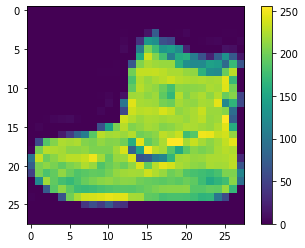

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Посмотрим первые 25 изображений:

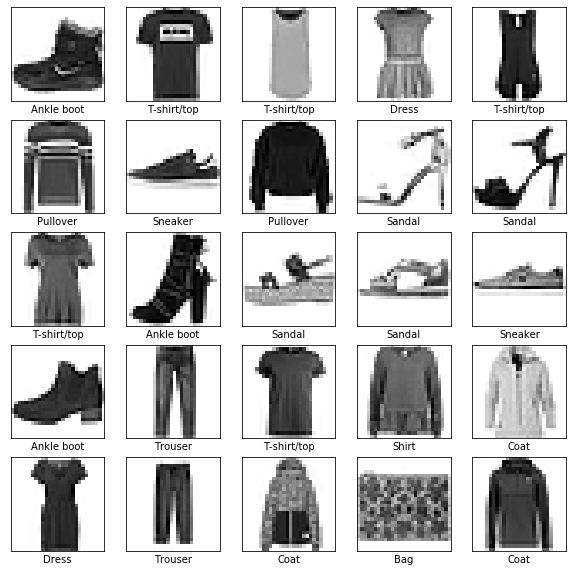

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.



### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [20]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5003 - accuracy: 0.8246
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3736 - accuracy: 0.8654
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3354 - accuracy: 0.8781


In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3823 - accuracy: 0.8622

Test accuracy: 0.8622000217437744


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых даыннх и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети - 

In [22]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

In [24]:
predictions[0]

array([2.5733030e-05, 4.3565663e-07, 2.3419166e-06, 1.0159597e-05,
       5.8343494e-06, 2.8252572e-02, 2.3059747e-05, 4.0114376e-01,
       1.0547623e-04, 5.7043064e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [27]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

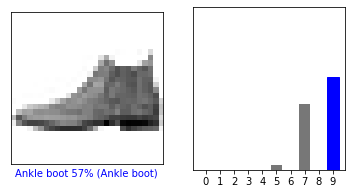

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

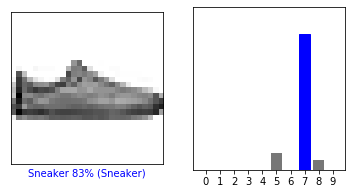

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний - 

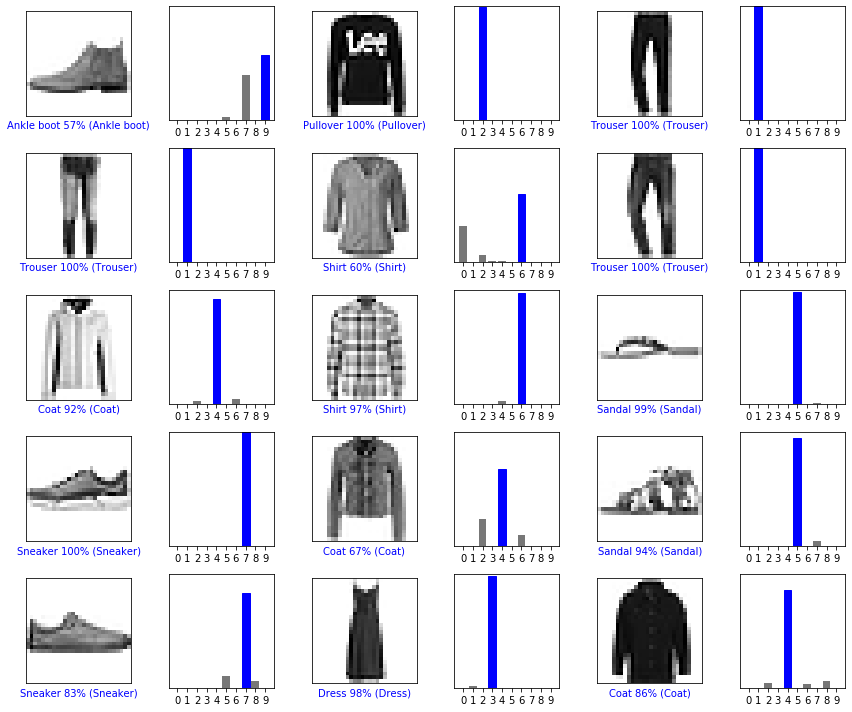

In [30]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети - 

In [31]:

img1 = test_images[1]

print(img1.shape)

(28, 28)


In [32]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img1,0))

print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.1555403e-04 8.7581578e-09 9.9509650e-01 1.6497852e-06 1.4661591e-03
  1.3565496e-08 3.3176730e-03 9.7038455e-10 2.3793366e-06 1.0380894e-11]]


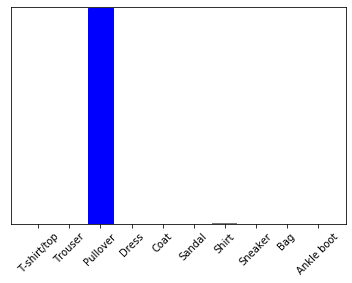

In [34]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [35]:
np.argmax(predictions_single[0])

2

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание

In [36]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist1=model1.fit(train_images, train_labels, epochs=30)
hist2=model2.fit(train_images, train_labels, epochs=30)
hist3=model3.fit(train_images, train_labels, epochs=30)



Epoch 1/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4993 - accuracy: 0.8256
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3767 - accuracy: 0.8645
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3375 - accuracy: 0.8762
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3137 - accuracy: 0.8856
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2959 - accuracy: 0.8921
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2801 - accuracy: 0.8960
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2685 - accuracy: 0.9018
Epoch 8/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2580 - accuracy: 0.9035
Epoch 9/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2489 - accuracy: 0.9071
Epoch 10/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.240

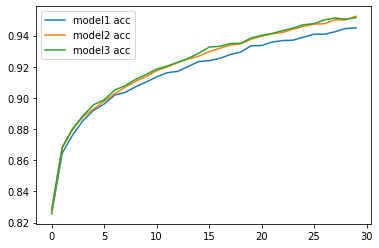

In [37]:
plt.plot(hist1.history['accuracy'],label='model1 acc')
plt.plot(hist2.history['accuracy'],label='model2 acc')
plt.plot(hist3.history['accuracy'],label ='model3 acc')
plt.legend()
plt.show()

In [38]:
# Save the model to disk.
model1.save_weights('model1.h5')
model2.save_weights('model2.h5')
model3.save_weights('model3.h5')
# Load the model from disk later using:
# model.load_weights('model.h5')

In [39]:
input1 = keras.layers.Input(shape=(28, 28))
x1= keras.layers.Flatten()(input1)
x1 = keras.layers.Dense(128, activation='relu')(x1)
x1 =keras.layers.Dense(10)(x1)

model11 =keras.models.Model(inputs=input1,outputs=x1)


x2= keras.layers.Flatten()(input1)
x2 = keras.layers.Dense(256, activation='relu')(x2)
x2=keras.layers.Dense(10)(x2)

model22 =keras.models.Model(inputs=input1,outputs=x2)

x3= keras.layers.Flatten()(input1)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x3=keras.layers.Dense(10)(x3)


model33 =keras.models.Model(inputs=input1,outputs=x3)
model11.load_weights('model1.h5')
model22.load_weights('model2.h5')
model33.load_weights('model3.h5')

out_all = keras.layers.Average()([model11.output,model22.output,model33.output])
out_all = keras.layers.Softmax()(out_all)
model_all=keras.models.Model(inputs =[input1],outputs =out_all)

In [40]:
model_all.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
flatten_5 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
flatten_6 (Flatten)             (None, 784)          0           input_1[0][0]                    
____________________________________________________________________________________________

In [41]:
model_all.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
predictions_single=model_all.predict(img)

print(predictions_single)

[[3.7856790e-04 5.4435515e-18 9.9839336e-01 7.2517379e-15 1.2023688e-03
  2.0236899e-17 2.5727888e-05 1.5827257e-26 5.7913814e-18 7.1692069e-19]]


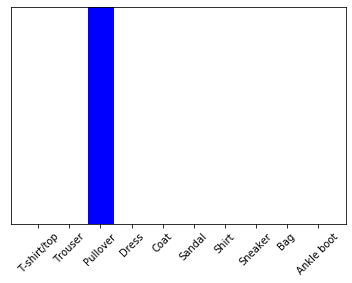

In [43]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [44]:
test_loss, test_acc = model_all.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 1.5743 - accuracy: 0.8986


In [45]:
from tensorflow.keras.utils import plot_model

In [46]:
plot_model(model_all,to_file='new_model-all.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


## стек сетей

In [47]:
from sklearn.metrics import confusion_matrix 

In [48]:
# стек сетей#
y_pred = model_all.predict(test_images)

y_pred_arg = np.argmax(y_pred, axis=1)




In [49]:
test_labels[0]

9

In [50]:
y_pred_arg.shape

(10000,)

In [51]:
y_pred_arg[0]

9

In [52]:
confusion_matrix(test_labels,  y_pred_arg)

array([[877,   1,   9,  18,   7,   1,  84,   0,   3,   0],
       [  2, 982,   0,  10,   4,   0,   1,   0,   1,   0],
       [ 16,   1, 771,   8, 135,   0,  69,   0,   0,   0],
       [ 21,   7,   4, 916,  28,   0,  19,   0,   5,   0],
       [  2,   0,  47,  29, 889,   0,  32,   0,   1,   0],
       [  0,   0,   0,   1,   0, 963,   0,  20,   1,  15],
       [114,   1,  60,  32, 103,   0, 682,   0,   8,   0],
       [  0,   0,   0,   0,   0,   8,   0, 977,   0,  15],
       [  2,   0,   3,   5,   4,   1,   5,   4, 976,   0],
       [  0,   0,   0,   0,   0,   4,   1,  42,   0, 953]])

Слои для объединения

In [53]:
first_input = keras.layers.Input(shape=(28,28 ))
x11= keras.layers.Flatten()(first_input)
first_dense = keras.layers.Dense(1, )(x11)

second_input = keras.layers.Input(shape=(28,28 ))
x22= keras.layers.Flatten()(second_input)
second_dense = keras.layers.Dense(1, )(x22)

merge_one = keras.layers.concatenate([first_dense, second_dense])

third_input = keras.layers.Input(shape=(28,28 ))
x33= keras.layers.Flatten()(third_input)
merge_two = keras.layers.concatenate([merge_one, x33])
merge_two=keras.layers.Dense(10)(merge_two)
merge_two = keras.layers.Softmax()(merge_two)

model_stek = keras.models.Model(inputs=[first_input, second_input, third_input], outputs=merge_two)
ada_grad = keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model_stek .compile(optimizer=ada_grad, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
plot_model(model_stek ,to_file='new_model_stek .png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [55]:
# merge samples, two input must be same shape
inp1 =  keras.layers.Input(shape=(10,32))
inp2 =  keras.layers.Input(shape=(10,32))
cc1 =  keras.layers.concatenate([inp1, inp2],axis=0) # Merge data must same row column
output =  keras.layers.Dense(30, activation='relu')(cc1)
model_3 =  keras.models.Model(inputs=[inp1, inp2], outputs=output)
model_3.summary()



Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 10, 32)]     0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 10, 32)]     0                                            
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 10, 32)       0           input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 10, 30)       990         concatenate_2[0][0]        

In [56]:
# merge row must same column size
inp1 =  keras.layers.Input(shape=(20,10))
inp2 =  keras.layers.Input(shape=(32,10))
cc1 =  keras.layers.concatenate([inp1, inp2],axis=1)
output =  keras.layers.Dense(30, activation='relu')(cc1)
model_4 =  keras.models.Model(inputs=[inp1, inp2], outputs=output)
model_4.summary()



Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 20, 10)]     0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 32, 10)]     0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 52, 10)       0           input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 52, 30)       330         concatenate_3[0][0]        

In [57]:
# merge column must same row size
inp1 =  keras.layers.Input(shape=(10,20))
inp2 =  keras.layers.Input(shape=(10,32))
cc1 =  keras.layers.concatenate([inp1, inp2],axis=2)
output =  keras.layers.Dense(30, activation='relu')(cc1)
model_5 =  keras.models.Model(inputs=[inp1, inp2], outputs=output)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [58]:
inp1 =  keras.layers.Input(shape=(10,32))
inp2 =  keras.layers.Input(shape=(10,32))
cc1 =  keras.layers.Add()([inp1, inp2]) # Merge data must same row column
output =  keras.layers.Dense(30, activation='relu')(cc1)
model_31 =  keras.models.Model(inputs=[inp1, inp2], outputs=output)
model_31.summary()


Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 10, 32)]     0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 10, 32)]     0                                            
__________________________________________________________________________________________________
add (Add)                       (None, 10, 32)       0           input_11[0][0]                   
                                                                 input_12[0][0]                   
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 10, 30)       990         add[0][0]                  

In [59]:
inp1 =  keras.layers.Input(shape=(10,32))
inp2 =  keras.layers.Input(shape=(10,32))
cc1 =  keras.layers.Multiply()([inp1, inp2]) # Merge data must same row column
output =  keras.layers.Dense(30, activation='relu')(cc1)
model_32 =  keras.models.Model(inputs=[inp1, inp2], outputs=output)
model_32.summary()


Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 10, 32)]     0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 10, 32)]     0                                            
__________________________________________________________________________________________________
multiply (Multiply)             (None, 10, 32)       0           input_13[0][0]                   
                                                                 input_14[0][0]                   
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 10, 30)       990         multiply[0][0]             

In [60]:
inp1 =  keras.layers.Input(shape=(10,32))
inp2 =  keras.layers.Input(shape=(10,32))
cc1 =  keras.layers.Subtract()([inp1, inp2]) # Merge data must same row column
output =  keras.layers.Dense(30, activation='relu')(cc1)
model_3 =  keras.models.Model(inputs=[inp1, inp2], outputs=output)
model_3.summary()


Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 10, 32)]     0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 10, 32)]     0                                            
__________________________________________________________________________________________________
subtract (Subtract)             (None, 10, 32)       0           input_15[0][0]                   
                                                                 input_16[0][0]                   
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 10, 30)       990         subtract[0][0]            

In [61]:
def myFunc(C):
  
  return C[0]*C[1]

In [62]:

inp1 =  keras.layers.Input(shape=(10,32))
inp2 =  keras.layers.Input(shape=(10,32))
cc1 =  keras.layers.Subtract()([inp1, inp2]) 
cross2 = keras.layers.Lambda(myFunc)([cc1,cc1])
output =  keras.layers.Dense(30, activation='relu')(cross2)
model_35 =  keras.models.Model(inputs=[inp1, inp2], outputs=output)
model_35.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 10, 32)]     0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 10, 32)]     0                                            
__________________________________________________________________________________________________
subtract_1 (Subtract)           (None, 10, 32)       0           input_17[0][0]                   
                                                                 input_18[0][0]                   
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 10, 32)       0           subtract_1[0][0]          

## Практическое задание

<ol>
    <li>Попробуйте обучить нейронную сеть на TensorFlow 2 на любом датасете imdb_reviews. 
        Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?<br><br>
    </li>
    <li>*2. Поработайте с документацией TensorFlow 2. Найдите полезные команды не разобранные на уроке.</li>
    
    
</ol>

## Дополнительные материалы

<ol>
    <li>www.tensorflow.org/api_docs</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.tensorflow.org/</li>
    <li>https://www.tensorflow.org/tutorials/keras/classification</li>
    <li>Singh P., Manure A. - Learn TensorFlow 2.0 - 2020</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Википедия</li>
    
</ol>